### 1. Introduction.

In this notebook we perform meaningful exploratory data analysis of aviation accident dataset from 1963
to 2023 in order to determine potential risks of aircrafts.

### 2. Business Understanding.

This project uses data from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. It is done for the purpose of recommendation to a prospective organization that is seeking to expand into a new industry involving purchase and operation of airplanes for commercial and private enterprises and focuses on the potential risks of aircraft.

### 3. Main Objective.

The main objective is to recommend safest aeroplanes to be purchased.

### 4. Specific Objectives.

1. Cleaning of the dataset.
2. Determining best makes for commercial use.
3. Determining best makes for private use.
4. Plotting graphs to determine safest aeroplane for commercial and private enterprises.

### 5.Data Understanding.

## Understanding.

This data was sourced from kaggle. It describes information about accidents and select incidents 
in the United States and International waters.

## Attributes.

The dataset has 31 attributes and 88889 records, here is what they represent;


1. Event ID - this is a unique identification code for all events in the dataset.
2. Investigation type- indicates whether it was an accident or incident.
3. Accident number - Gives the number of event in the records.
4. Event date - gives the date the event occured.
5. Location - Gives the city or state the event occurred.
6. Country - Indicates the country the aeroplane is from also event occurrence. this data has mostly US
7. Latitude - latitude of event occurrence.
8. Longitude - longitude of event occurrence.
9. Airport code - unique code identifier for the airport.
10. Airport name - the name of airport owning plane involved in event.
11. Injury Severity - The degree of injury inflicted on passengers i.e fatal, non-fatal and incident.
12. Aircraft damage - damage to the airplane whether minor, substantial or destroyed.
13. Aircraft category - shows the classes of aircraft in the dataset which are helicopter, airplane, glider, powered parachute, gyrocraft and weight-shift.
14. Registration number - this is the registration number of aircraft involved in event.
15. Make - this refers to the manufacturing company of the various aircraft to be analysed.
16. Model - this is the model of the specific make of aircraft.
17. Amateur built - Indicates whether it is an amateur built or not.
18. Number of Engines - refers to how many engines the aircraft has.
19. Engine type - indicates what type of engine the aircraft has.
20. FAR description - refers to the Federal Aviation Regulations that govern all aviation activities in US.
21. Schedule - this is the index of the schedule for the aircraft.
22. Purpose of flight - explains what the aircraft is used for.
23. Air carrier - gives name of company or aviation school.
24. Total fatal injuries - count for fatal injuries per event.
25. Total serious injuries - count for serious injuries per event.
26. Total minor injuries - count for minor injuries per event.
27. Total uninjuried - count for uninjuried passengers per event.
28. Weather condition - code for weather conditions during event.
29. Broad phase of light - indicates at which instance the event occurred.
30. report status - describes cause of event.
31. Publication date - gives the date of publication of event.

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

loading data

In [92]:
data = pd.read_csv('AviationData.csv', encoding='latin-1', low_memory=False)

In [93]:
type(data) # this shows the type of the data to be analysed.

pandas.core.frame.DataFrame

In [94]:
data.info()# this provides information about the data struci.e rows, columns, data type of columns and total entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [95]:
data.head()# This helps in viewing the first 5 rows to know what kind of data frame we are working with.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [96]:
data.tail() # This shows the last 5 rows of the dataframe.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [97]:
data.describe() # This shows statistical details of the dataframe.

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [98]:
data.keys() #this shows the keys of the dictionary that is the data.

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Checking for duplicates

In [99]:
data.duplicated() #Checks for any duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885    False
88886    False
88887    False
88888    False
Length: 88889, dtype: bool

In [100]:
data.duplicated().sum() # Indicates total number of duplicates.

0

In [101]:
data.duplicated('Event.Id').sum()

938

In [102]:
data.duplicated('Event.Date')

0        False
1        False
2        False
3        False
4        False
         ...  
88884    False
88885     True
88886     True
88887     True
88888    False
Length: 88889, dtype: bool

In [103]:
data.duplicated('Accident.Number').sum()

26

In [104]:
data.duplicated('Latitude')

0        False
1         True
2        False
3         True
4         True
         ...  
88884     True
88885     True
88886     True
88887     True
88888     True
Length: 88889, dtype: bool

In [105]:
data.duplicated('Longitude')

0        False
1         True
2        False
3         True
4         True
         ...  
88884     True
88885     True
88886     True
88887     True
88888     True
Length: 88889, dtype: bool

In [106]:
data.duplicated('Airport.Name')

0        False
1         True
2         True
3         True
4         True
         ...  
88884     True
88885     True
88886     True
88887     True
88888     True
Length: 88889, dtype: bool

In [107]:
data.duplicated('Airport.Code').sum()

78514

In [108]:
data.duplicated('Registration.Number').sum()

9784

## Checking for unique values.

In [210]:
data['Investigation_Type'].value_counts() # How many times each unique value is present 

Investigation_Type
Accident    70835
Incident     2505
Name: count, dtype: int64

In [199]:
data['Weather_Condition'].value_counts()

Weather_Condition
VMC    64379
IMC     4968
UNK      709
Unk      237
Name: count, dtype: int64

In [212]:
data['Country'].value_counts()

Country
United States                       68987
Brazil                                324
Canada                                249
Mexico                                234
United Kingdom                        182
                                    ...  
Guinea                                  1
Saint Vincent and the Grenadines        1
Malampa                                 1
Bosnia and Herzegovina                  1
Turks and Caicos Islands                1
Name: count, Length: 195, dtype: int64

In [213]:
data['Location'].value_counts()

Location
ANCHORAGE, AK          360
MIAMI, FL              183
CHICAGO, IL            167
ALBUQUERQUE, NM        165
HOUSTON, TX            156
                      ... 
HI. NAT'L PARK, HI       1
COBALT, ID               1
LEVAN, UT                1
INGOLSTADT, GERMANY      1
Brasnorte,               1
Name: count, Length: 24425, dtype: int64

In [215]:
data['Event_Date'].value_counts()

Event_Date
1984-06-30    25
1982-05-16    25
2000-07-08    24
1984-08-25    24
1983-08-05    24
              ..
2014-03-12     1
2014-03-10     1
2014-03-04     1
2014-03-03     1
2022-12-29     1
Name: count, Length: 12369, dtype: int64

In [217]:
data['Airport_Name'].value_counts()

Airport_Name
PRIVATE                           219
Private                           178
NONE                              125
PRIVATE STRIP                     110
Private Airstrip                   96
                                 ... 
SANONA CREEK AIRSTRIP               1
PENNS CAVE                          1
ANDY BARNHART                       1
CARIBOU MUNICIPAL                   1
WICHITA DWIGHT D EISENHOWER NT      1
Name: count, Length: 21525, dtype: int64

In [218]:
data['Injury_Severity'].value_counts()

Injury_Severity
Non-Fatal     56627
Fatal          5262
Fatal(1)       4723
Fatal(2)       2809
Incident       1557
              ...  
Fatal(37)         1
Fatal(132)        1
Fatal(31)         1
Fatal(65)         1
Fatal(131)        1
Name: count, Length: 72, dtype: int64

In [117]:
data['Make'].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [118]:
data['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [119]:
data['Model'].value_counts()

Model
152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
GC-1-A              1
737-3S3             1
MBB-BK117-B2        1
GLASSAIR GL25       1
M-8 EAGLE           1
Name: count, Length: 12318, dtype: int64

In [120]:
data['Model'].unique()

array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

In [219]:
data['Injury_Severity'].value_counts()

Injury_Severity
Non-Fatal     56627
Fatal          5262
Fatal(1)       4723
Fatal(2)       2809
Incident       1557
              ...  
Fatal(37)         1
Fatal(132)        1
Fatal(31)         1
Fatal(65)         1
Fatal(131)        1
Name: count, Length: 72, dtype: int64

In [220]:
data['Injury_Severity'].unique()

array(['Fatal(2)', 'Fatal(4)', 'Non-Fatal', 'Fatal(1)', 'Fatal(3)',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(23)', 'Fatal(10)',
       'Fatal(9)', 'Fatal(17)', 'Fatal(13)', 'Fatal(29)', 'Fatal(70)',
       'Fatal(135)', 'Fatal(31)', 'Fatal(14)', 'Fatal(256)', 'Fatal(25)',
       'Fatal(82)', 'Fatal(156)', 'Fatal(28)', 'Fatal(18)', 'Fatal(43)',
       'Fatal(15)', 'Fatal(270)', 'Fatal(144)', 'Fatal(174)', 'Fatal(11)',
       'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)', 'Fatal(27)',
       'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(47)', 'Fatal(56)',
       'Fatal(37)', 'Fatal(132)', 'Fatal(68)', 'Fatal(52)', 'Fatal(65)',
       'Fatal(72)', 'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(125)', 'Fatal(75)', 'Fatal(104)',
       'Fatal(229)', 'Fatal(16)', 'Fatal(80)', 'Fatal(88)', 'Fatal(19)',
       'Fatal(60)', 'Fatal(113)', 'Fatal(143)', 'Fatal(83

In [221]:
data['Total_Fatal_Injuries'].value_counts()

Total_Fatal_Injuries
0.0      58592
1.0       7435
2.0       4271
3.0       1300
4.0        919
         ...  
135.0        1
60.0         1
113.0        1
73.0         1
176.0        1
Name: count, Length: 97, dtype: int64

In [222]:
data['Far_Description'].value_counts()

Far_Description
091                               18181
Part 91: General Aviation          3146
NUSN                               1463
137                                1009
135                                 737
NUSC                                632
121                                 583
UNK                                 295
Part 137: Agricultural              261
PUBU                                247
Part 135: Air Taxi & Commuter       188
129                                 129
133                                 107
Part 121: Air Carrier                52
Part 133: Rotorcraft Ext. Load       26
091K                                 14
ARMF                                  6
Part 129: Foreign                     6
Unknown                               6
125                                   5
Non-U.S., Commercial                  4
Part 125: 20+ Pax,6000+ lbs           3
107                                   3
Public Use                            2
103                     

In [223]:
data['Weather_Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

## Checking for missing values

In [126]:
data.isnull() # Used to show missing values indicated as True and false means presnt value

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [127]:
data.isnull().sum() # Shows number of missing values in each column.

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

## standardizing

In [224]:
# interchanging dot to underscore for uniformity
data.columns = data.columns.str.replace('.', '_').str.title()
data.columns # checking changes made.

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Airport_Name', 'Injury_Severity',
       'Aircraft_Damage', 'Aircraft_Category', 'Registration_Number', 'Make',
       'Model', 'Amateur_Built', 'Number_Of_Engines', 'Engine_Type',
       'Far_Description', 'Purpose_Of_Flight', 'Air_Carrier',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Broad_Phase_Of_Flight', 'Total_Passengers', 'Fatal_Injury_Proportion',
       'Fatal_Injury_Rate', 'Fatal_Injury_Ratio', 'Passengers_No',
       'Uninjured_Ratio'],
      dtype='object')

# Droping columns


In [ ]:
# Latitude and longitude have too many missing values hence will use location.
data.drop('Latitude', axis= 1, inplace = True)

In [136]:
data.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Longitude,Airport_Code,Airport_Name,Injury_Severity,...,Purpose_Of_Flight,Air_Carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [137]:
data.drop('Longitude', axis=1, inplace=True)

In [141]:
data.drop('Airport_Code', axis=1, inplace=True)# Will use Airport_name

In [140]:
data.drop('Report_Status', axis=1, inplace=True) #not important to objectives

In [144]:
data.drop('Publication_Date', axis=1, inplace=True)# not important to objectives

In [ ]:
data.drop['Far_Description', axis=1, inplace=True]

Filling missing values.

In [200]:
 # The make column is important for knowing which safe business or private plane is needed to be purchased.
data['Make'].fillna(value = 'None', inplace=True)

In [201]:
# Missing value for total uninjured column is set to zero fir statistical analysis below.
data['Total_Uninjured'].fillna(value = 0, inplace=True)

In [204]:
data['Aircraft_Damage'].fillna(value = 'Minor', inplace=True)

In [202]:
data['Broad_Phase_Of_Flight'].fillna(value = 'Unknown', inplace=True)

In [235]:
data['Total_Fatal_Injuries'].fillna(value = 0, inplace=True)

In [236]:
data['Total_Serious_Injuries'].fillna(value = 0, inplace=True)

In [237]:
data['Total_Minor_Injuries'].fillna(value = 0, inplace=True)

In [151]:
data['Total_Uninjured']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
88884    0.0
88885    0.0
88886    1.0
88887    0.0
88888    1.0
Name: Total_Uninjured, Length: 88889, dtype: float64

Creating column for passengers

In [168]:
data['Passengers_No'] = data['Total_Fatal_Injuries'] + data['Total_Serious_Injuries'] + data['Total_Minor_Injuries'] + data['Total_Uninjured']

Calculating ratio for uninjured and injured passengers

In [169]:
data['Uninjured_Ratio'] = data['Total_Uninjured'] / data['Passengers_No']

In [170]:
data['Fatal_Injury_Ratio'] = data['Total_Fatal_Injuries'] / data['Passengers_No']

Get a boolean mask where True indicates a row with any NaN in the specified columns

In [172]:
mask = data[['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Fatal_Injury_Ratio', 'Uninjured_Ratio']].isna().any(axis=1)
data = data[~mask] #filter out rows with Nan

next

In [173]:
# Create new dataframe of the top main manufacturers

In [175]:
data['Make'].unique()

array(['Stinson', 'Piper', 'Rockwell', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [180]:
main_manufacturers = ['Boeing', 'Bombardier', 'Airbus', 'Cessna', 'Embraer', 'Dassault', 'Lockheed', 'Gulfstream']
main_makes = data[data['Make'].isin(main_manufacturers)] # Use the isin() function to filter the DataFrame
main_makes.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Name,Injury_Severity,Aircraft_Damage,Aircraft_Category,...,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Total_Passengers,Fatal_Injury_Proportion,Fatal_Injury_Rate,Fatal_Injury_Ratio,Passengers_No,Uninjured_Ratio
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,Fatal(4),Destroyed,NaN,...,0.0,0.0,IMC,Unknown,4.0,1.0,1.0,1.0,4.0,0.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,...,0.0,2.0,VMC,Takeoff,2.0,0.0,0.0,0.0,2.0,1.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,HANOVER,Non-Fatal,Substantial,Airplane,...,0.0,2.0,IMC,Landing,2.0,0.0,0.0,0.0,2.0,1.0
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,...,0.0,0.0,IMC,Takeoff,1.0,1.0,1.0,1.0,1.0,0.0
17,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",United States,NaN,Fatal(3),Destroyed,Airplane,...,0.0,0.0,VMC,Unknown,3.0,1.0,1.0,1.0,3.0,0.0


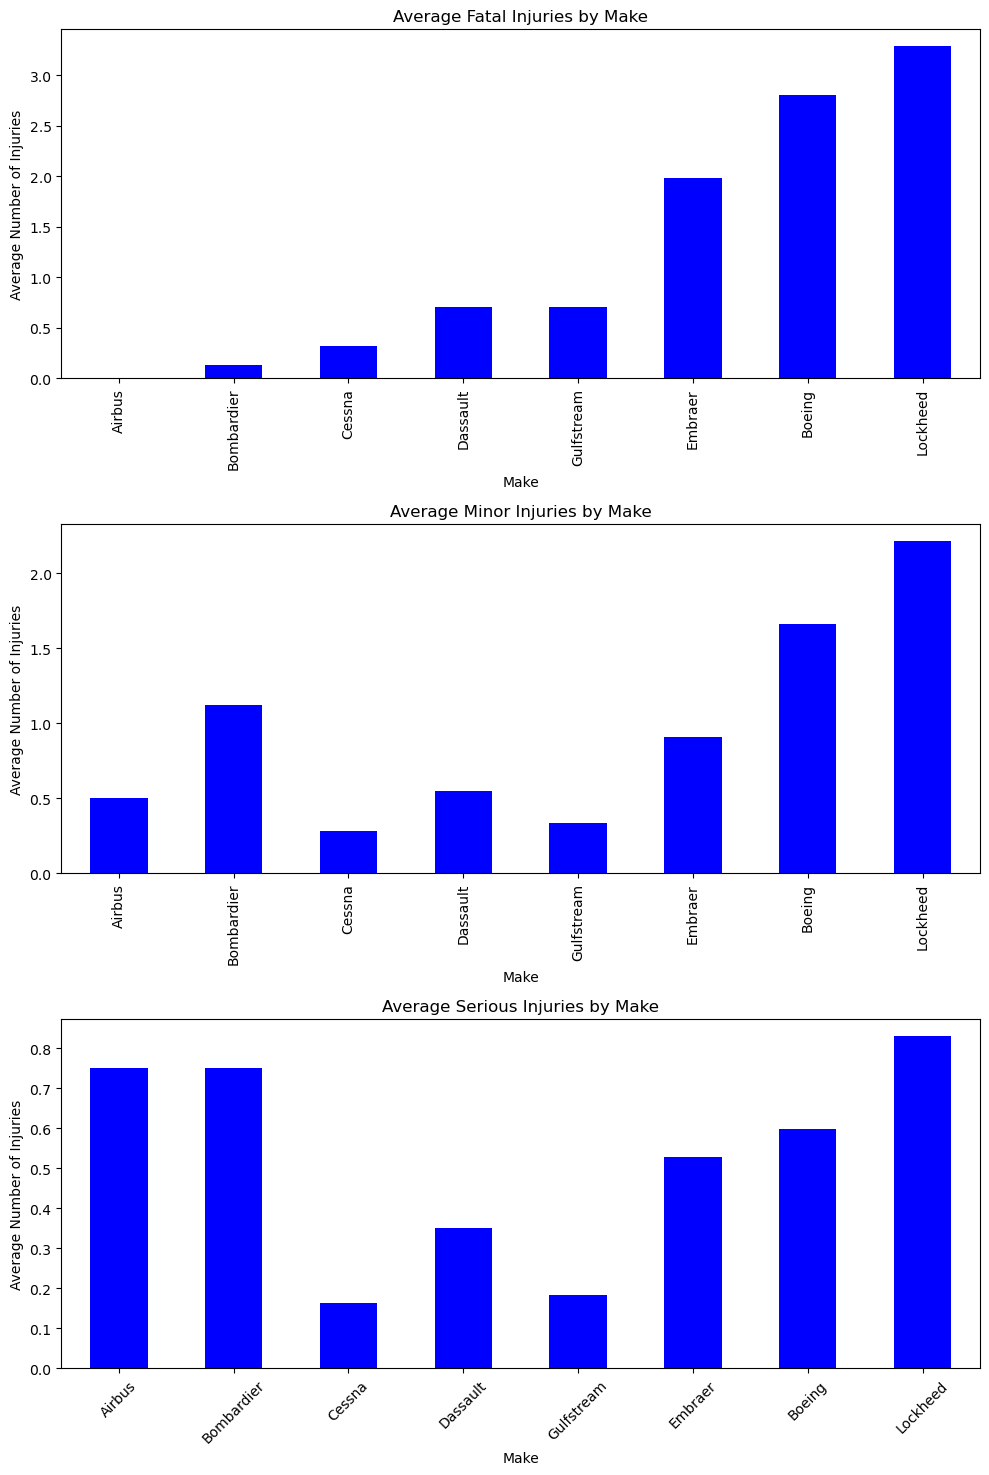

In [188]:
# Group and calculate mean
grouped_df =main_makes.groupby(['Make'])[['Total_Fatal_Injuries', 'Total_Minor_Injuries', 'Total_Serious_Injuries']].mean()

# Sort values
sorted_df = grouped_df.sort_values(by='Total_Fatal_Injuries', ascending=True)

# Creates a new figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Creates individual bar plots
sorted_df['Total_Fatal_Injuries'].plot(kind='bar', ax=axs[0], color='blue')
sorted_df['Total_Minor_Injuries'].plot(kind='bar', ax=axs[1], color='blue')
sorted_df['Total_Serious_Injuries'].plot(kind='bar', ax=axs[2], color='blue')

# Sets titles and labels
axs[0].set_title('Average Fatal Injuries by Make')
axs[1].set_title('Average Minor Injuries by Make')
axs[2].set_title('Average Serious Injuries by Make')

for ax in axs:
    ax.set_xlabel('Make')
    ax.set_ylabel('Average Number of Injuries')

# Adjusts layout and rotate x-axis labels
plt.tight_layout()
plt.xticks(rotation=45)

# Show the plot
plt.show()

conclusion

1. As seen from the graphs above airbus has significantly less average injuries in all three
categoriies which are minor injuries, serious injuries and fatal injuries.

2. Airbus also has close none fatal injuries which is a an improtant advantage fatal injuries
mostly mean death or near death experience which is bad for business.

3. Cessna aircraft as seen from the bar graphs has the least average injuries in all three categories
compared to the rest of which gulfstream althoungh has higher injuries than cessna, their planes also
have low average injuries count. 

Recommendations

I am recommending the purchase of Airbus planes for our commercial division this is due to our dataset which indicates close to zero fatal injuries in an Airbus accident and also a smaller number of average minor injuries.The make Boeing is one of its major competitor in commercial aircraft enterprise but has higher injury rates in both fatal injuries and minor injuries as seen from the graph. from research Airbus last year delivered more aircraft and landed more orders than Boeing. the most ordered airbus is A320.

Cessna jets are more appropriate for a private enterprise because cessna as seen from the graphs appears
to be the safest manufacturer of private jets as it has the lowest average injuries in all categories. Research also dictates that Cessna is reknown for its excellent performance and advanced technological features.

For cost-effectiveness in purchasing private jets, the gulfstream would be prefferable to cessna since its 
average injury rate as seen in the graphs is slightly higher and from research it is cost effective, luxurious and has good performance.  

The Lockheed make as seen from the bar graphs appears to be the most unsafe aircraft hence it will be ill 
advised to purchase one.